#### Document scanner 

1- Tentar pegar o contorno retangular correspondente (para isso, tentamos achar um contorno com 4 pontos).

2- Transformar tudo que estiver dentro desse contorno, para pegarmos uma imagem só dele.



In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

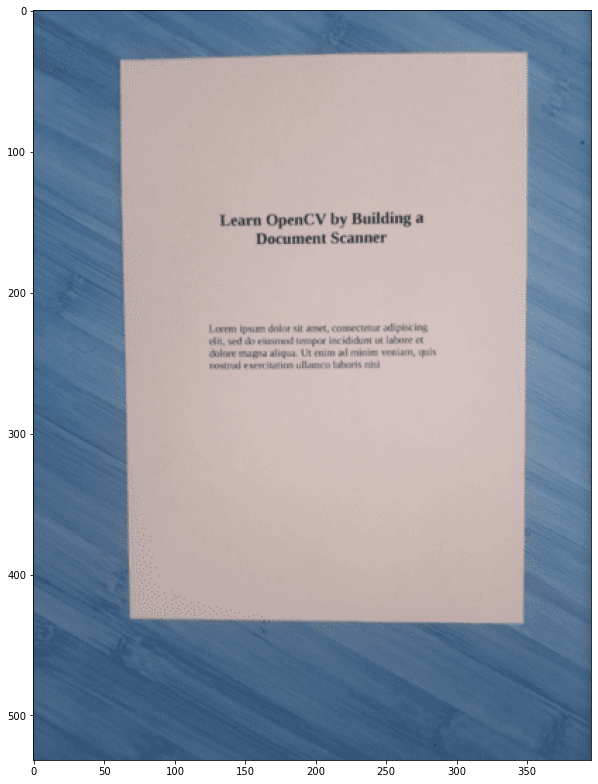

In [2]:
# Vamos pegar o contorno da página.

img = cv2.imread('./scanner.png')
plt.figure(figsize=(10, 20))
plt.imshow(img)
plt.show()


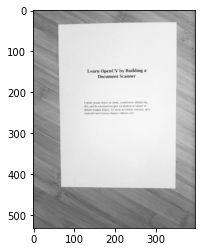

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='Greys_r')
plt.show()

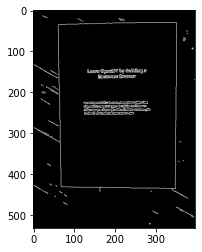

In [4]:
edged = cv2.Canny(img_gray, 60, 100)
plt.imshow(edged, cmap='Greys_r')
plt.show()

In [5]:
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

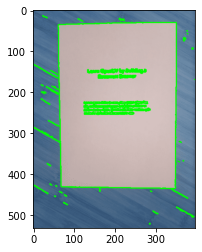

In [6]:
img_copy = img.copy()

with_contour = cv2.drawContours(img_copy, contours, -1, (0,255, 0), 2)

plt.imshow(with_contour)
plt.show()

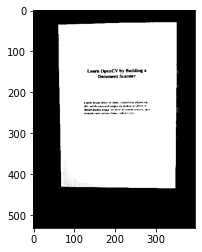

In [7]:
_, img_thr = cv2.threshold(img_gray, -1, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(img_thr, cmap='Greys_r')
plt.show()

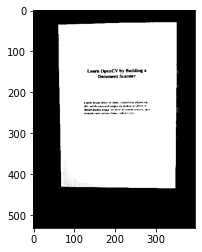

In [8]:
_, img_thr = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(img_thr, cmap='Greys_r')
plt.show()

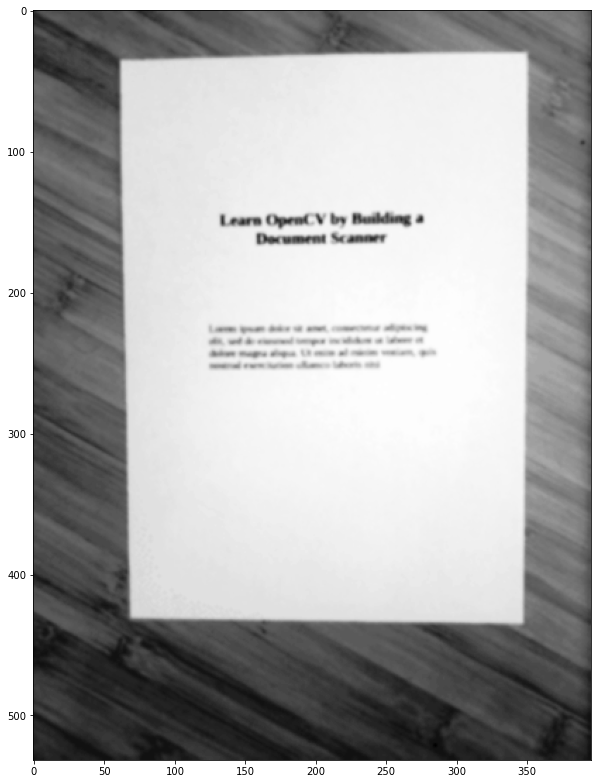

In [9]:
blur = cv2.GaussianBlur(img_gray, (5,5), 0)

plt.figure(figsize=(10, 20))
plt.imshow(blur, cmap='Greys_r')
plt.show()

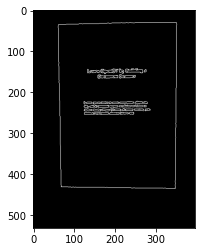

In [10]:
edged = cv2.Canny(blur, 60, 100)
plt.imshow(edged, cmap='Greys_r')
plt.show()

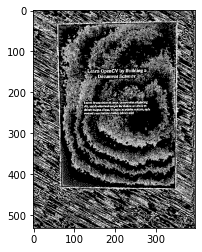

In [11]:
th_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 2)

plt.imshow(th_gaussian, cmap='Greys_r')
plt.show()

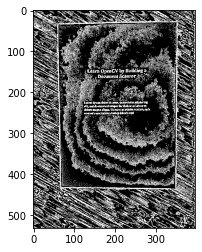

In [12]:
th_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 2)

plt.imshow(th_gaussian, cmap='Greys_r')
plt.show()

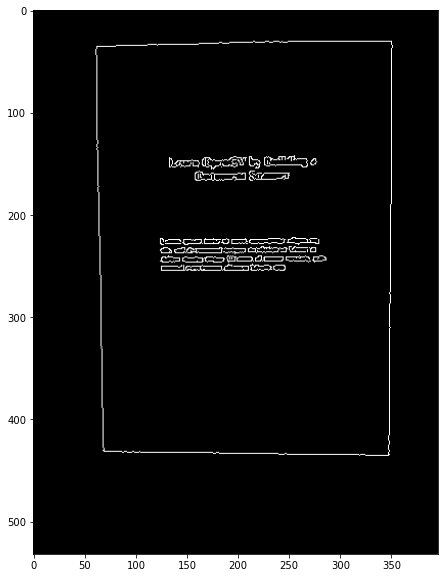

In [13]:
# No final:
img = cv2.imread('scanner.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
edged = cv2.Canny(blur, 60, 100)

plt.figure(figsize=(10,10))
plt.imshow(edged, cmap = 'gray')
plt.show()


In [14]:
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
len(contours)

78

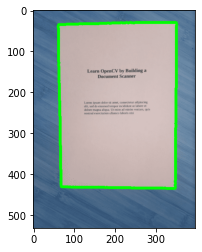

In [16]:
img_copy = img.copy()

with_contours = cv2.drawContours(img_copy, [contours[-1]],
                                 0, (0,255,0), 5)

plt.imshow(with_contours)
plt.show()

In [17]:
np.argmin([cv2.contourArea(cnt) for cnt in contours])

23

In [18]:
np.argmax([cv2.contourArea(cnt) for cnt in contours])

77

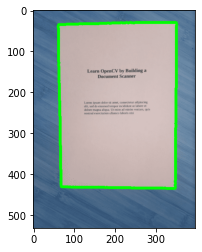

In [19]:
img_copy = img.copy()

with_contours = cv2.drawContours(img_copy, [contours[77]],
                                 0, (0,255,0), 5)

plt.imshow(with_contours)
plt.show()

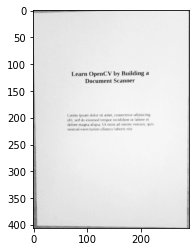

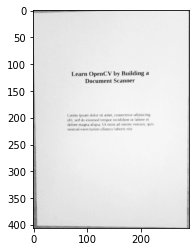

In [20]:
for contour in contours:
    area = cv2.contourArea(contour)
    
    if area > 60000:
        x,y,w,h = cv2.boundingRect(contour)
        
        folha = img_gray[y:y+h, x:x+w].copy()
        plt.imshow(folha, cmap='Greys_r')
        plt.show()

In [21]:
rectangles = []

for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02*peri, True)
    
    if len(approx) == 4:
        rectangles.append(approx)

In [22]:
max_rect = max(rectangles, key=cv2.contourArea)

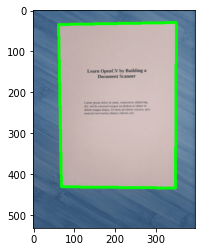

In [23]:
img_copy = img.copy()

with_contours = cv2.drawContours(img_copy, [max_rect],
                                 0, (0,255,0), 5)

plt.imshow(with_contours)
plt.show()

In [24]:
from imutils.perspective import four_point_transform

In [25]:
max_rect.shape

(4, 1, 2)

In [26]:
max_rect

array([[[350,  30]],

       [[ 62,  35]],

       [[ 69, 431]],

       [[348, 434]]], dtype=int32)

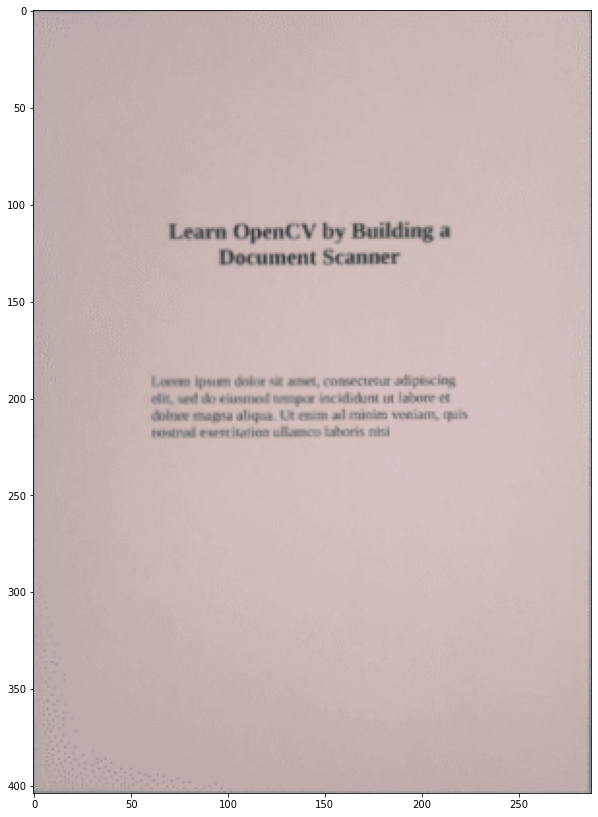

In [27]:
# Vamos ver o resultado da transformação
warped = four_point_transform(img, max_rect[:,0,:])

plt.figure(figsize=(10, 20))
plt.imshow(warped, cmap = 'gray')
plt.show()